In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

In [2]:
df_fin = pd.read_excel('База данных.xlsx', sheet_name = 'Данные', nrows=393)

df_fin.sample(n=10)

,название,year,Revenue,depreciation,EBITDA,Net Income,Cash,current assets (t),current assets (t-1),fixed assets,...,NCWC t,NCWC t-1,NCWC change,NCWC/Revenue,Fixed Assets /Total Assets,EBIT/Total Assets,Current Debt /Current Assets,text,fraud,sector
192,ржд,2020,2.279212e+09,261181000.0,420710000.0,-52899000.0,113684000.0,477883000.0,460066000.0,4.887804e+09,...,4635000.0,82699000.0,-78064000.0,0.002034,0.853340,0.027851,1.009794,2020 will go down in history as an exceptional...,1,Транспорт
376,globaltrans,2015,6.819983e+07,5957253.0,12143010.0,1982956.0,4104079.0,10262960.0,13095273.0,6.934114e+07,...,-2735771.0,-10616478.0,7880707.0,-0.040114,0.844227,0.075311,0.789536,"Outperforming the market, returning value. In ...",0,Транспорт
195,ржд,2017,2.251703e+09,205946000.0,495542000.0,139704000.0,162584000.0,469119000.0,412819000.0,3.812780e+09,...,-327221000.0,-339329000.0,12108000.0,-0.145322,0.853414,0.064820,0.589094,"In 2017, Russian Railways delivered against it...",1,Транспорт
110,ммк (Магнитогорский металлургический комбинат),2017,4.401000e+08,32560000.0,118600000.0,69300000.0,32470000.0,167940000.0,124470000.0,3.044100e+08,...,76860000.0,59340000.0,17520000.0,0.174642,0.658312,0.186069,1.843874,Global trends in the iron and steel industry i...,0,Черная металлургия
308,северсталь,2014,3.158373e+08,21187544.0,84900000.0,-53082685.0,106704000.0,203200000.0,160583725.0,1.876950e+08,...,105627000.0,77151332.0,28475668.0,0.334435,0.441745,0.149949,2.082543,"Severstal remains a global player, with a numb...",1,Черная металлургия
310,сегежа,2020,6.898665e+07,6272696.0,17400000.0,-395815.0,3670197.0,24535910.0,22402647.0,4.231522e+07,...,8020035.0,50656.0,7969379.0,0.116255,0.473231,0.124442,1.485596,It is with pleasure that I present you with Se...,0,Леспром
54,детский мир,2020,1.487791e+08,10413000.0,25718000.0,6749000.0,1826000.0,49535000.0,45901000.0,4.300000e+07,...,-9180000.0,-11708000.0,2528000.0,-0.061702,0.443326,0.157793,0.843652,It is a great honor for me to lead the Board o...,0,Торговля
224,россети московский регион,2015,1.323557e+08,20769969.0,45533787.0,12521883.0,400645.0,29148955.0,30557853.0,2.899117e+08,...,-32643250.0,-45835205.0,13191955.0,-0.246633,0.890343,0.076052,0.471725,The year 2015 for the Company was marked by di...,0,Электроэнергетика
113,ммк (Магнитогорский металлургический комбинат),2014,3.028000e+08,29940000.0,62100000.0,-4800000.0,19620000.0,135600000.0,81708000.0,2.749000e+08,...,39120000.0,13563000.0,25557000.0,0.129194,0.583132,0.068219,1.405473,The Russian economy faced serious challenges a...,0,Черная металлургия
271,ростелеком,2016,2.974460e+08,55589000.0,89082000.0,11751000.0,4257000.0,68872000.0,67796000.0,3.436670e+08,...,-65188000.0,-62893000.0,-2295000.0,-0.219159,0.618460,0.060274,0.513740,2016 was a year of momentous transformation fo...,1,Телекоммуникации


In [3]:
df = pd.DataFrame()


for i,j in zip(["TA", "R", "NI", "NI/R", "OM", "ROE", "ROA", "NCWC gr", "TA/R", 
             "Cash/R", "NCWC/R", "FA/TA", "NCWC t", "text", "fraud"], ["Total Assets", "Revenue", "Net Income", "Net Income/Revenue", "Operating Margin", 
             "ROE", "ROA", "NCWC change", "Total Assets/Revenue", "Cash/Revenue", "NCWC/Revenue", 
             "Fixed Assets /Total Assets", "NCWC t", "text", "fraud"]):
    df[i] = df_fin[j]

df

,TA,R,NI,NI/R,OM,ROE,ROA,NCWC gr,TA/R,Cash/R,NCWC/R,FA/TA,NCWC t,text,fraud
0,220089000.0,1.198640e+08,3310000.0,0.027615,0.068152,0.048108,0.015039,-20952000.00,1.836156,0.129622,-0.098812,0.706610,-11844000.0,The past year was a true ordeal for the whole ...,0
1,200355000.0,1.148350e+08,24219000.0,0.210903,0.274437,0.295480,0.120880,2389000.00,1.744721,0.098890,0.079314,0.720466,9108000.0,The global mineral fertiliser market was preca...,0
2,186784000.0,1.080620e+08,12768000.0,0.118154,0.179184,0.163347,0.068357,769000.00,1.728489,0.096796,0.062177,0.696468,6719000.0,"In 2018, Acron Group continued to pursue its u...",0
3,186894000.0,9.434200e+07,13432000.0,0.142376,0.223040,0.147676,0.071870,2523000.00,1.981026,0.151597,0.063068,0.647180,5950000.0,The year 2017 saw positive trends on the miner...,0
4,194287000.0,8.935900e+07,26155000.0,0.292696,0.410591,0.298158,0.134620,-36578000.00,2.174230,0.304032,0.038351,0.598409,3427000.0,The last year was one of the decade’s most cha...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,610799000.0,1.532537e+09,28642000.0,0.018689,0.036581,0.173090,0.046893,-15461000.00,0.398554,0.015900,-0.078538,0.497385,-120363000.0,It is my pleasure to report that X5 Retail Gro...,0
382,565258000.0,1.295008e+09,31394000.0,0.024242,0.044285,0.198142,0.055539,-7608000.00,0.436490,0.021316,-0.081005,0.493453,-104902000.0,As I look back at 2017 and our outlook at the ...,0
383,473485000.0,1.033667e+09,22291000.0,0.021565,0.044209,0.175464,0.047079,-15119000.00,0.458063,0.017598,-0.094125,0.490651,-97294000.0,It has been just over one year since I took ov...,0
384,402115000.0,8.088180e+08,14174000.0,0.017524,0.042655,0.135354,0.035249,-51411000.00,0.497164,0.011075,-0.101599,0.470015,-82175000.0,X5 aims to create value for all of its stakeho...,1


## Удаление выбросов

In [4]:
#import scipy.stats as stats
#X_fin = df.iloc[:,:-2]

#z = np.abs(stats.zscore(X_fin))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
#data_clean = df[(z<4).all(axis=1)]

#find how many rows are left in the dataframe 
#data_clean.shape

In [5]:
data_clean = df

In [6]:
#data_clean = df[(df.ROE > 2) & (df.ROE < 2) & (df.ROA > -2) & (df.ROA < 2)
#                & (df['TA/R'] < 4) & (df['NI/R'] < 0.9) & (df['NI/R'] > -0.75) 
#                & (df['Cash/R'] < 0.8)]

In [7]:
#data_clean = df[(df.ROE > - 3) & (df.ROE < 5) & (df.ROA > -3)]

## Описательная статистика

In [8]:
data_clean.describe()

,TA,R,NI,NI/R,OM,ROE,ROA,NCWC gr,TA/R,Cash/R,NCWC/R,FA/TA,NCWC t,fraud
count,3.860000e+02,3.860000e+02,3.860000e+02,386.000000,386.000000,386.000000,386.000000,3.860000e+02,386.000000,386.000000,386.000000,386.000000,3.860000e+02,386.000000
mean,1.205102e+09,6.679644e+08,6.758281e+07,0.087746,0.136344,0.564064,0.057306,6.210529e+05,1.640658,0.113018,0.071428,0.573036,4.501323e+07,0.251295
std,3.417810e+09,1.499238e+09,1.915783e+08,0.153366,0.426643,6.612717,0.135357,1.585530e+08,0.843179,0.130344,0.320091,0.231852,2.570923e+08,0.434321
min,1.444000e+06,9.930000e+05,-1.176130e+08,-0.821643,-7.554521,-9.279693,-1.568035,-1.147000e+09,0.398554,0.000058,-1.433140,0.016057,-1.544000e+09,0.000000
25%,1.062966e+08,8.316003e+07,2.088466e+06,0.020647,0.072454,0.049956,0.016785,-1.221895e+07,1.048839,0.033109,-0.095319,0.443357,-1.333922e+07,0.000000
50%,3.244740e+08,1.764628e+08,1.215689e+07,0.069856,0.140766,0.124328,0.046490,-4.884855e+05,1.486130,0.069260,0.027711,0.601324,2.911500e+06,0.000000
75%,6.460862e+08,4.888030e+08,4.945400e+07,0.154285,0.224271,0.274403,0.098201,1.122350e+07,2.039734,0.143802,0.181546,0.727855,5.835400e+07,0.750000
max,2.704723e+10,1.024135e+10,2.093071e+09,1.003099,1.146985,128.258824,0.678912,1.692000e+09,6.145565,0.888090,1.688663,1.147197,2.191338e+09,1.000000


In [9]:
#df.describe()

## Графики распределения

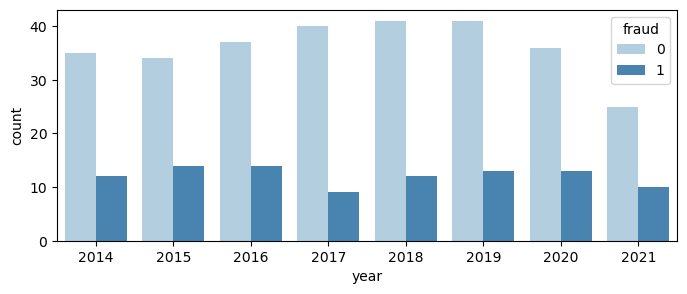

In [10]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.countplot(x='year', hue='fraud', data=df_fin, palette = 'Blues', ax = ax);

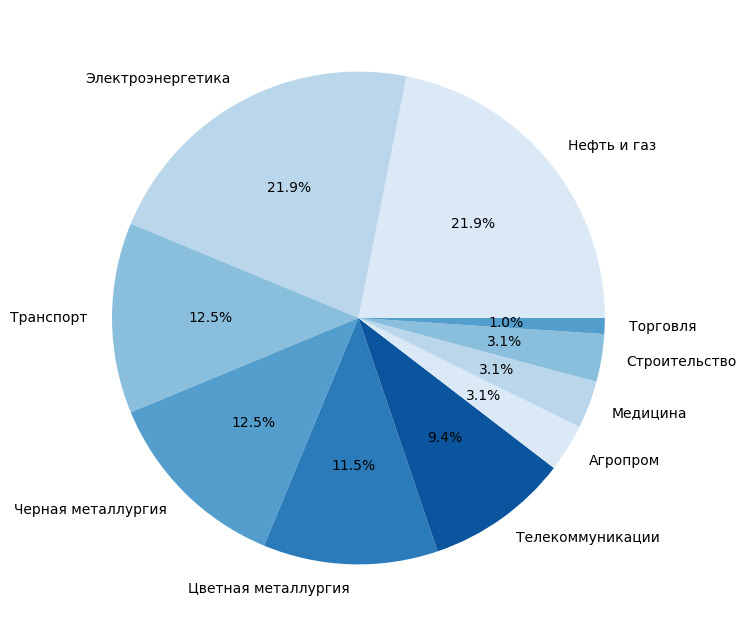

In [11]:
data_fintext = pd.read_excel('База данных.xlsx', sheet_name = 'Данные', nrows=378)

# Подготавливаем данные
df_fint = data_fintext.groupby('sector', axis=0).sum()
df_fint = df_fint.loc[df_fint['fraud'] != 0]

df_fint = df_fint.sort_values(ascending=False, by = 'fraud')
cmap = plt.get_cmap("Blues")
colors = sns.color_palette('Blues')[ 0:6 ]

# Строим график
df_fint['fraud'].plot(kind='pie', subplots=True, figsize=(8, 8), 
                  colors=colors, autopct='%1.1f%%')
plt.title("")
plt.ylabel("")
plt.rcParams['font.size'] = '12'
plt.show()

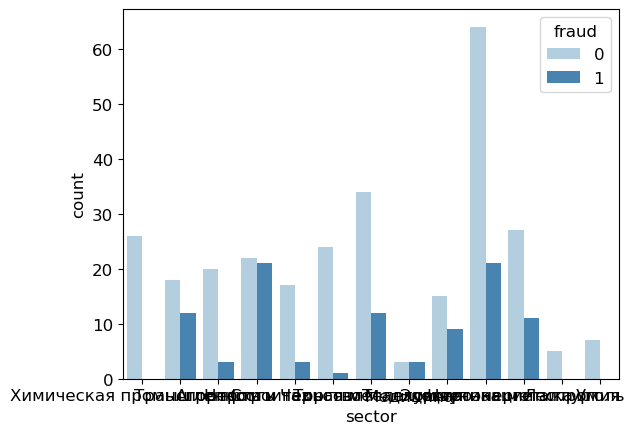

In [12]:
fig, ax = plt.subplots()
sns.countplot(x='sector', hue='fraud', data=data_fintext, palette = 'Blues', ax = ax);

In [13]:
data_fintext_g = data_fintext.groupby('sector').size()
data_fintext_g

sector
Агропром                     23
Леспром                       5
Медицина                      6
Нефть и газ                  43
Строительство                20
Телекоммуникации             24
Торговля                     25
Транспорт                    30
Уголь                         7
Химическая промышленность    26
Цветная металлургия          38
Черная металлургия           46
Электроэнергетика            85
dtype: int64

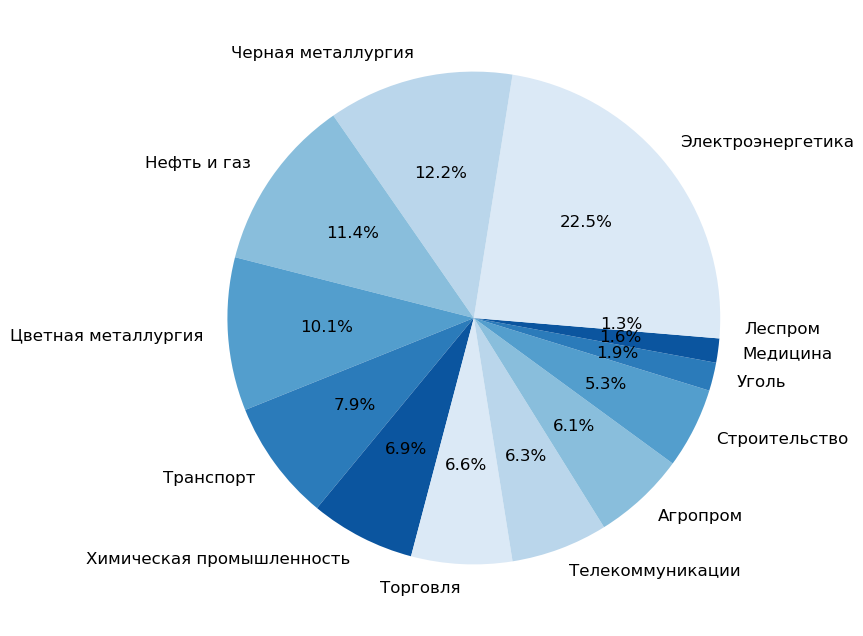

In [14]:
data_fintext_g = data_fintext_g.sort_values(ascending=False)
cmap = plt.get_cmap("Blues")
colors = sns.color_palette('Blues')[ 0:6 ]

data_fintext_g.plot(kind='pie', subplots=True, figsize=(8, 8), 
                  colors=colors, autopct='%1.1f%%')
plt.title("")
plt.ylabel("")
plt.rcParams['font.size'] = '18'
plt.show()

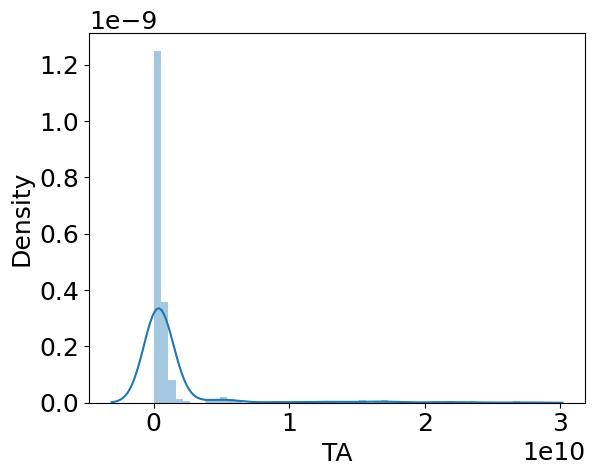

In [15]:
sns_plot = sns.distplot(data_clean['TA'])
fig = sns_plot.get_figure()

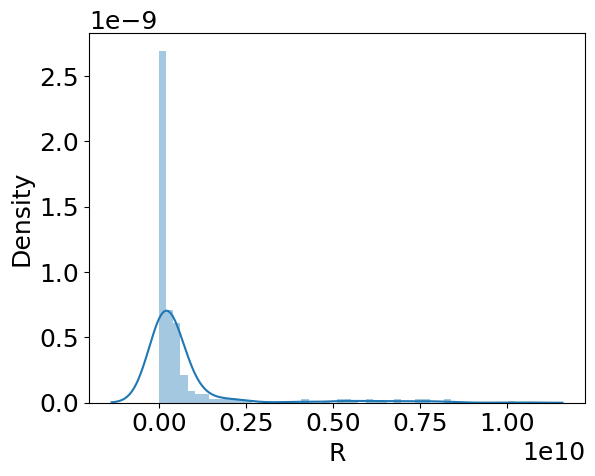

In [16]:
sns_plot = sns.distplot(data_clean['R'])
fig = sns_plot.get_figure()

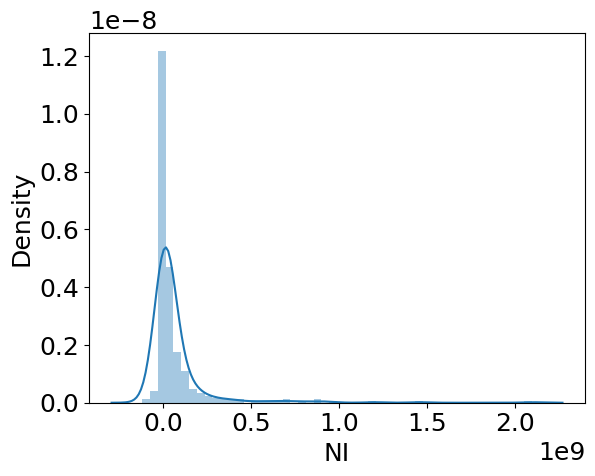

In [17]:
sns_plot = sns.distplot(data_clean['NI'])
fig = sns_plot.get_figure()

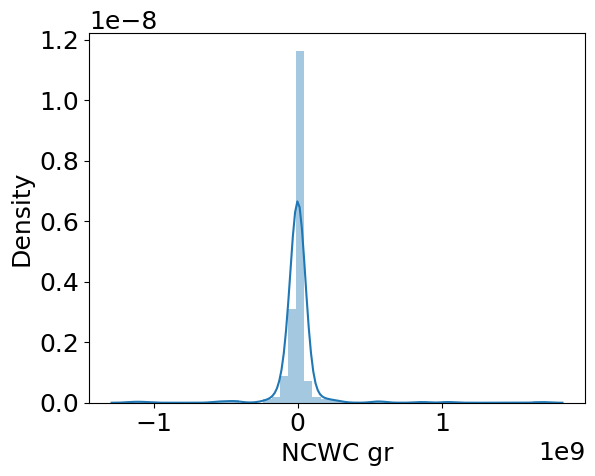

In [18]:
sns_plot = sns.distplot(data_clean['NCWC gr'])
fig = sns_plot.get_figure()

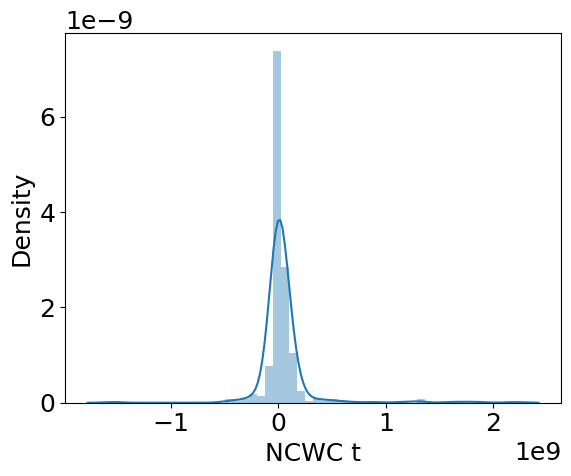

In [19]:
sns_plot = sns.distplot(data_clean['NCWC t'])
fig = sns_plot.get_figure()

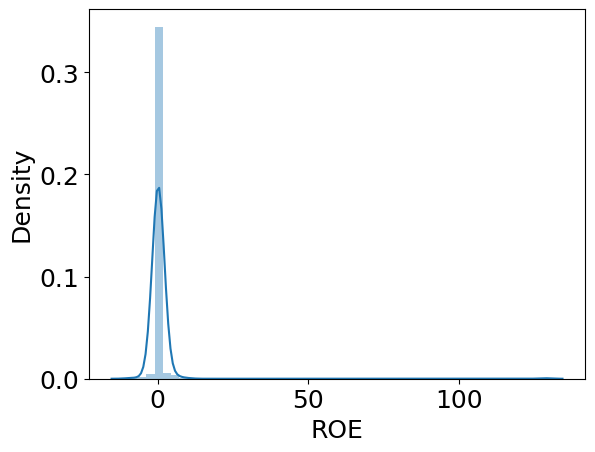

In [20]:
sns_plot = sns.distplot(data_clean['ROE'])
fig = sns_plot.get_figure()

### Приводим к нормальному распределению

In [21]:
data_clean['lnTA'] = np.log(data_clean['TA'])
data_clean['lnR'] = np.log(data_clean['R'])
data_clean['lnNI'] = np.log(data_clean['NI'])
data_clean['lnNCWC_gr'] = np.log(data_clean['NCWC gr'])
data_clean['lnNCWC'] = np.log(data_clean['NCWC t'])
data_clean['lnROE'] = np.log(data_clean['ROE'])
data_clean['lnROA'] = np.log(data_clean['ROA'])
data_clean['lnOM'] = np.log(data_clean['OM'])

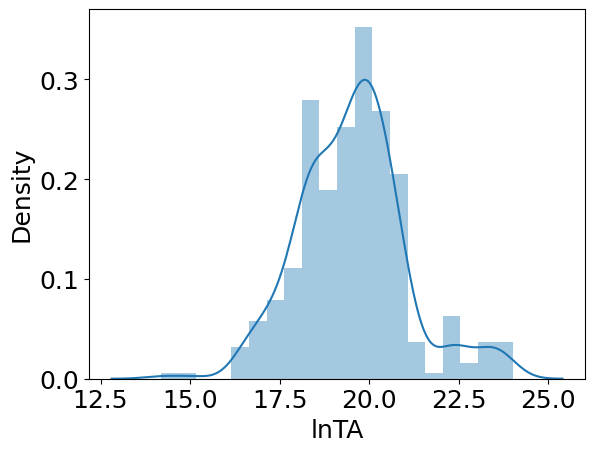

In [22]:
sns_plot = sns.distplot(data_clean['lnTA'])
fig = sns_plot.get_figure()

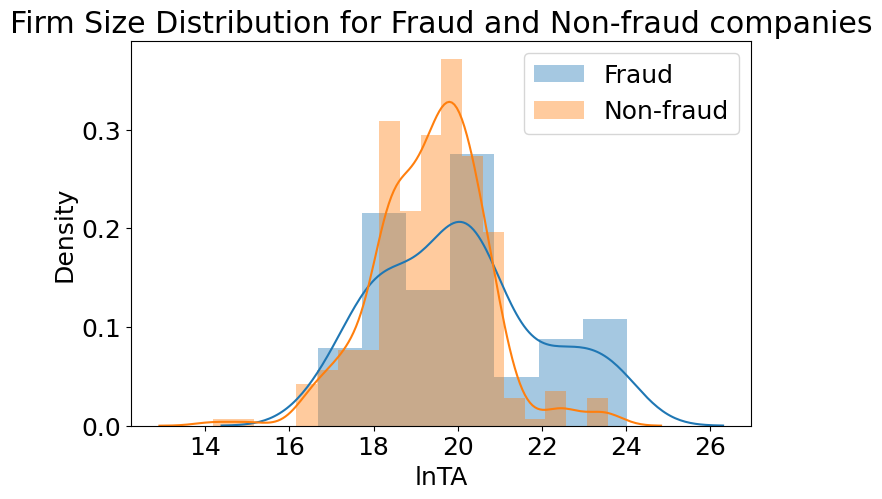

In [23]:
f, ax = plt.subplots( figsize =(8,5) ) 
sns.distplot( data_clean[data_clean.fraud == 1].lnTA, ax = ax, label = 'Fraud') 
sns.distplot( data_clean[data_clean.fraud == 0].lnTA, ax = ax, label = 'Non-fraud') 
plt.title( 'Firm Size Distribution for Fraud and Non-fraud companies' ) 
plt.legend() 
plt.show() 

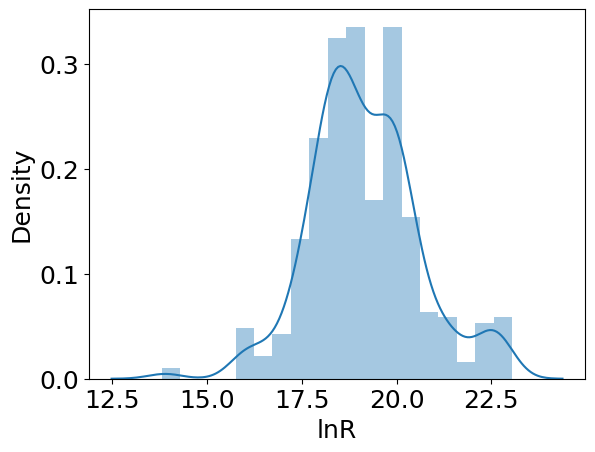

In [24]:
sns_plot = sns.distplot(data_clean['lnR'])
fig = sns_plot.get_figure()

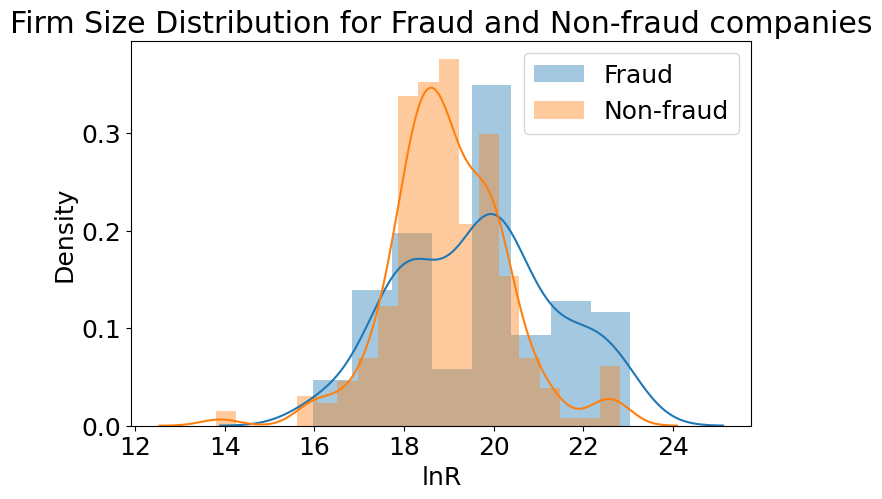

In [25]:
f, ax = plt.subplots( figsize =(8,5) ) 
sns.distplot( data_clean[data_clean.fraud == 1].lnR, ax = ax, label = 'Fraud') 
sns.distplot( data_clean[data_clean.fraud == 0].lnR, ax = ax, label = 'Non-fraud') 
plt.title( 'Firm Size Distribution for Fraud and Non-fraud companies' ) 
plt.legend() 
plt.show() 

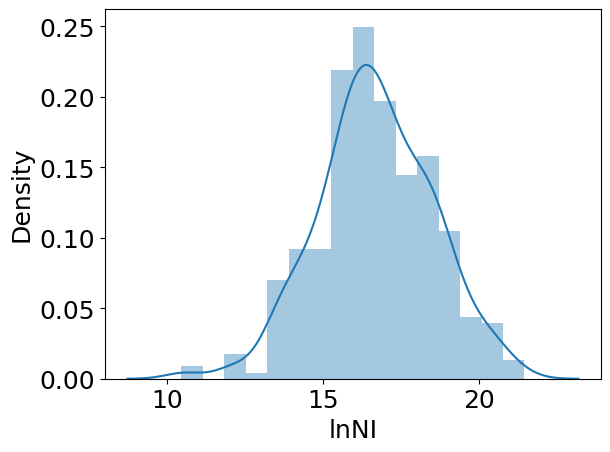

In [26]:
sns_plot = sns.distplot(data_clean['lnNI'])
fig = sns_plot.get_figure()

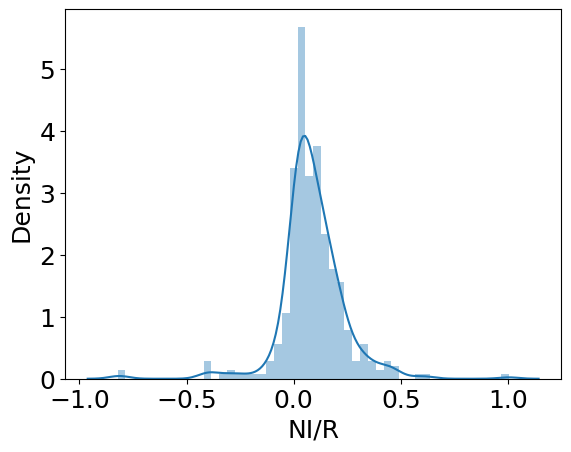

In [27]:
sns_plot = sns.distplot(data_clean['NI/R'])
fig = sns_plot.get_figure()

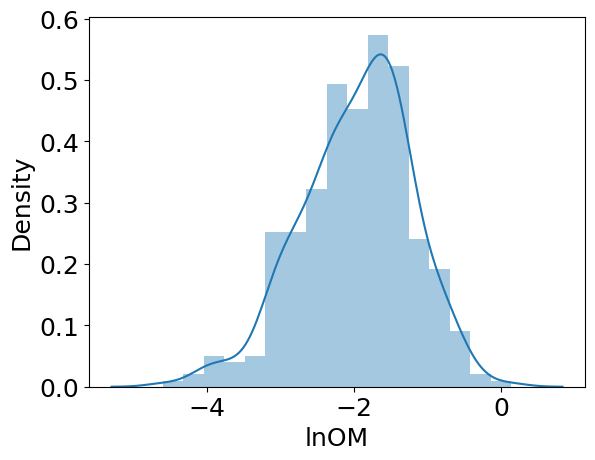

In [28]:
sns_plot = sns.distplot(data_clean['lnOM'])
fig = sns_plot.get_figure()

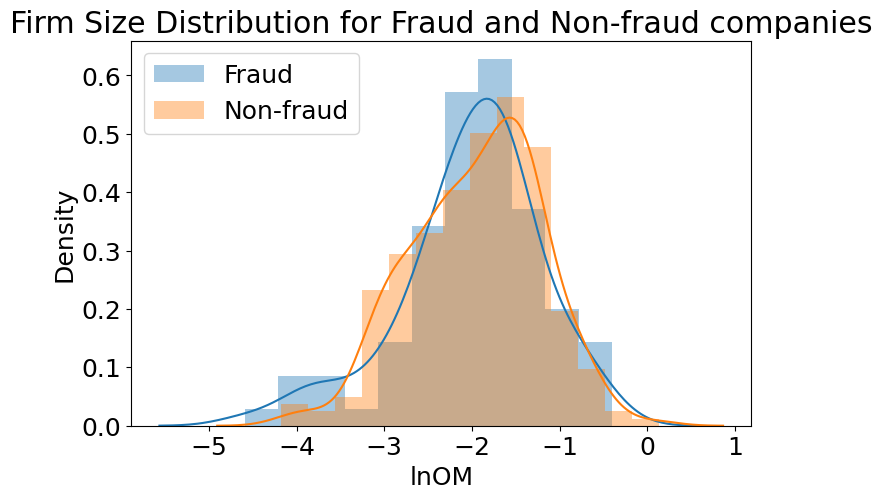

In [29]:
f, ax = plt.subplots( figsize =(8,5) ) 
sns.distplot( data_clean[data_clean.fraud == 1].lnOM, ax = ax, label = 'Fraud') 
sns.distplot( data_clean[data_clean.fraud == 0].lnOM, ax = ax, label = 'Non-fraud') 
plt.title( 'Firm Size Distribution for Fraud and Non-fraud companies' ) 
plt.legend() 
plt.show() 

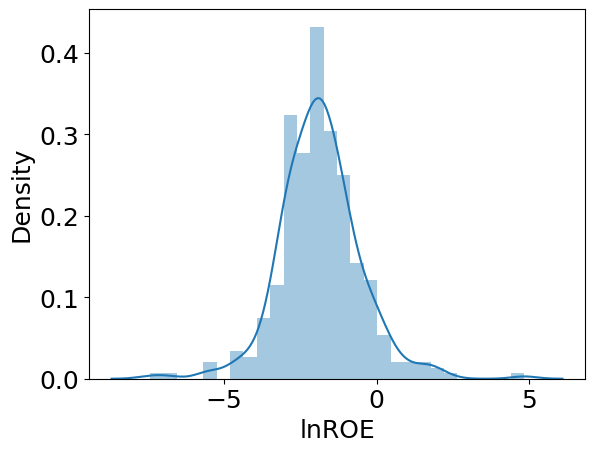

In [30]:
sns_plot = sns.distplot(data_clean['lnROE'])
fig = sns_plot.get_figure()

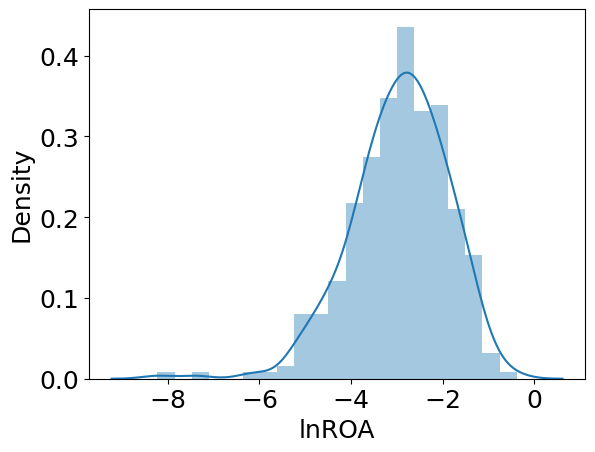

In [31]:
sns_plot = sns.distplot(data_clean['lnROA'])
fig = sns_plot.get_figure()

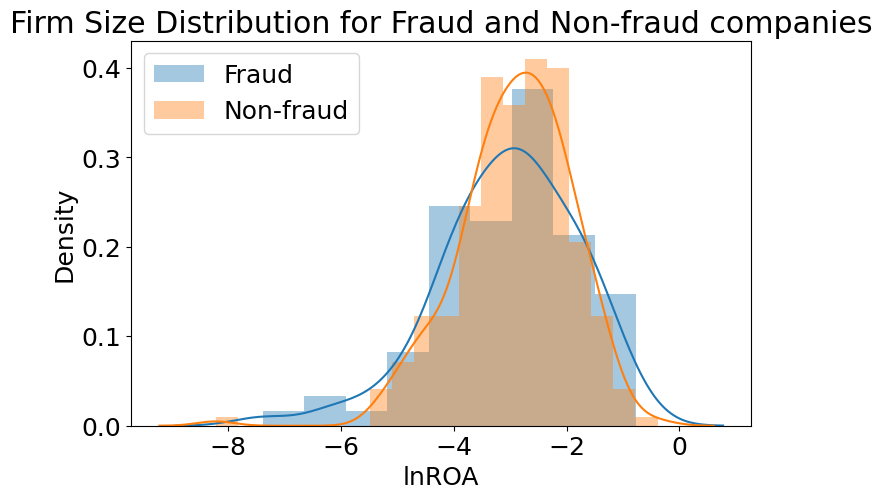

In [32]:
f, ax = plt.subplots( figsize =(8,5) ) 
sns.distplot( data_clean[data_clean.fraud == 1].lnROA, ax = ax, label = 'Fraud') 
sns.distplot( data_clean[data_clean.fraud == 0].lnROA, ax = ax, label = 'Non-fraud') 
plt.title( 'Firm Size Distribution for Fraud and Non-fraud companies' ) 
plt.legend() 
plt.show() 

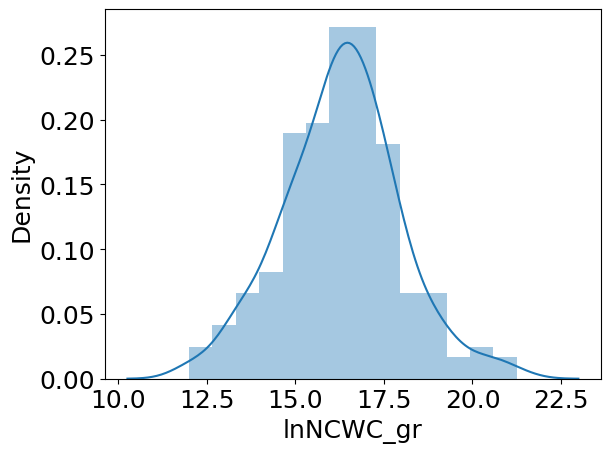

In [33]:
sns_plot = sns.distplot(data_clean['lnNCWC_gr'])
fig = sns_plot.get_figure()

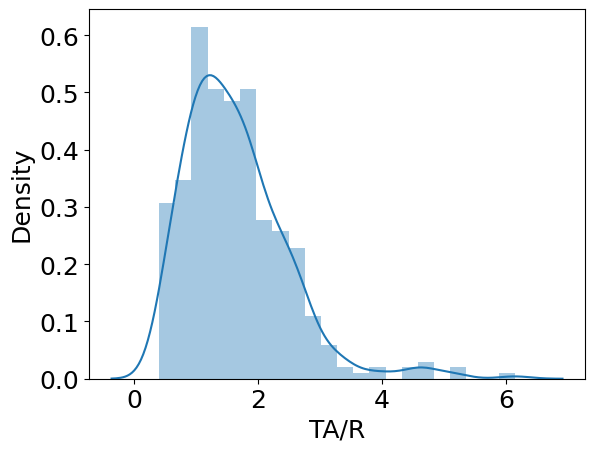

In [34]:
sns_plot = sns.distplot(data_clean['TA/R'])
fig = sns_plot.get_figure()

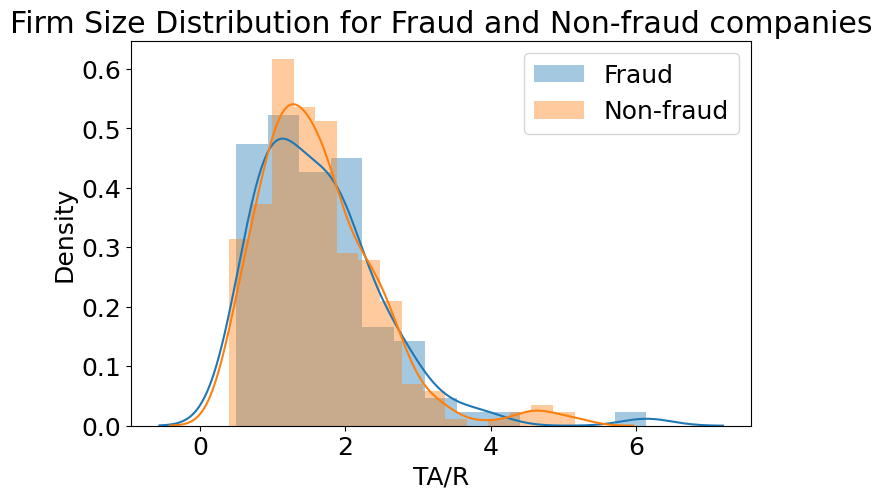

In [35]:
f, ax = plt.subplots( figsize =(8,5) ) 
sns.distplot( data_clean[data_clean.fraud == 1]['TA/R'], ax = ax, label = 'Fraud') 
sns.distplot( data_clean[data_clean.fraud == 0]['TA/R'], ax = ax, label = 'Non-fraud') 
plt.title( 'Firm Size Distribution for Fraud and Non-fraud companies' ) 
plt.legend() 
plt.show() 

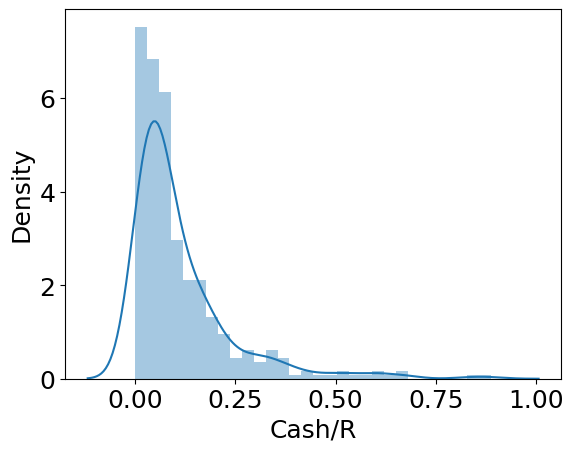

In [36]:
sns_plot = sns.distplot(data_clean['Cash/R'])
fig = sns_plot.get_figure()

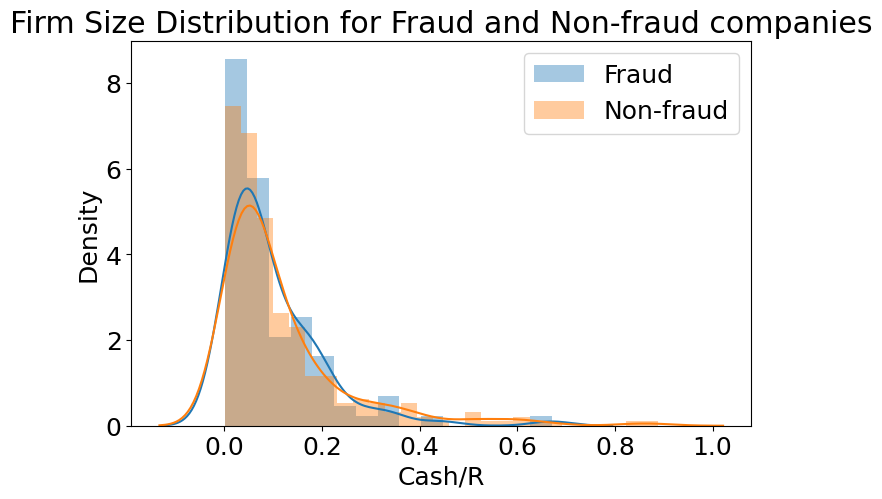

In [37]:
f, ax = plt.subplots( figsize =(8,5) ) 
sns.distplot( data_clean[data_clean.fraud == 1]['Cash/R'], ax = ax, label = 'Fraud') 
sns.distplot( data_clean[data_clean.fraud == 0]['Cash/R'], ax = ax, label = 'Non-fraud') 
plt.title( 'Firm Size Distribution for Fraud and Non-fraud companies' ) 
plt.legend() 
plt.show() 

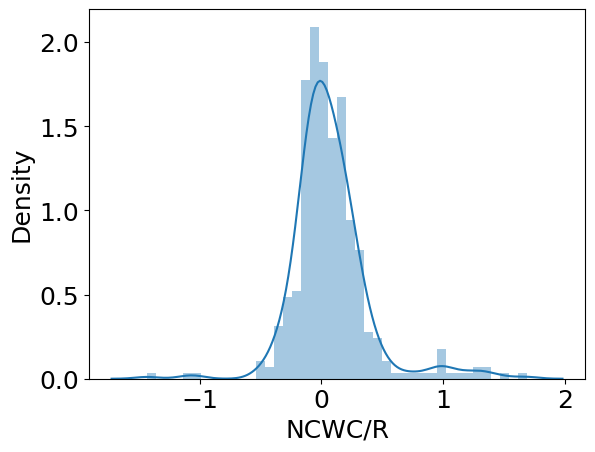

In [38]:
sns_plot = sns.distplot(data_clean['NCWC/R'])
fig = sns_plot.get_figure()

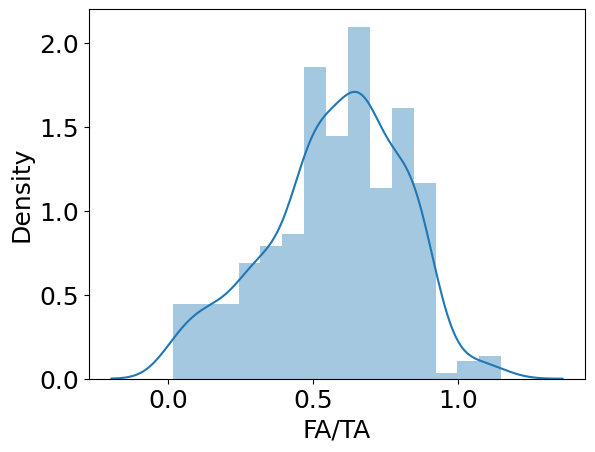

In [39]:
sns_plot = sns.distplot(data_clean['FA/TA'])
fig = sns_plot.get_figure()

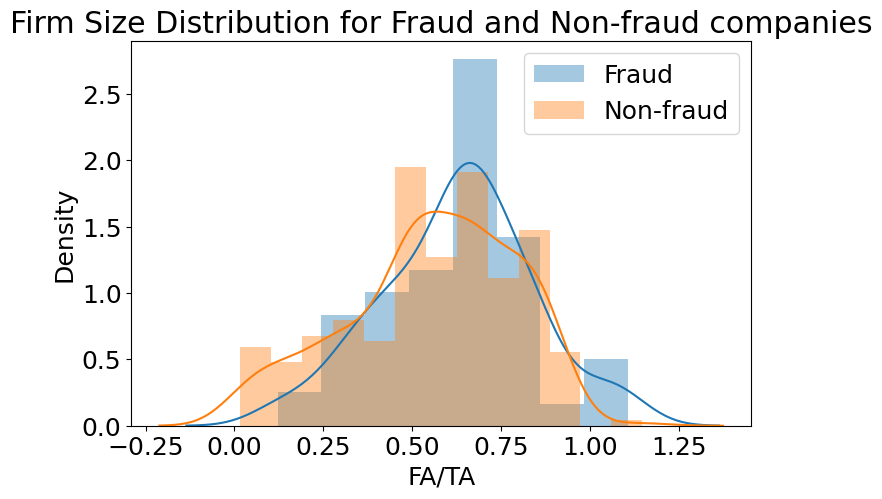

In [40]:
f, ax = plt.subplots( figsize =(8,5) ) 
sns.distplot( data_clean[data_clean.fraud == 1]['FA/TA'], ax = ax, label = 'Fraud') 
sns.distplot( data_clean[data_clean.fraud == 0]['FA/TA'], ax = ax, label = 'Non-fraud') 
plt.title( 'Firm Size Distribution for Fraud and Non-fraud companies' ) 
plt.legend() 
plt.show() 

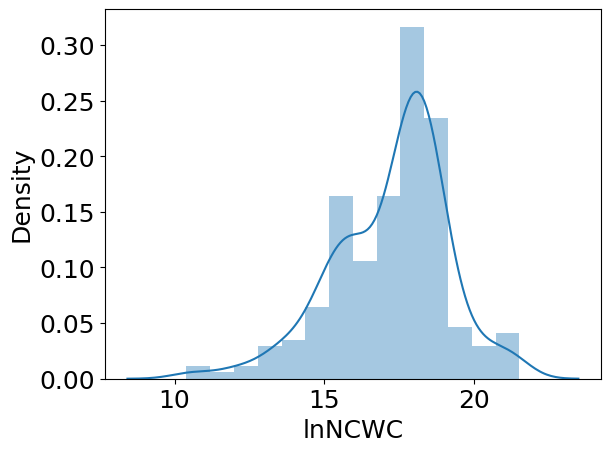

In [41]:
sns_plot = sns.distplot(data_clean['lnNCWC'])
fig = sns_plot.get_figure()

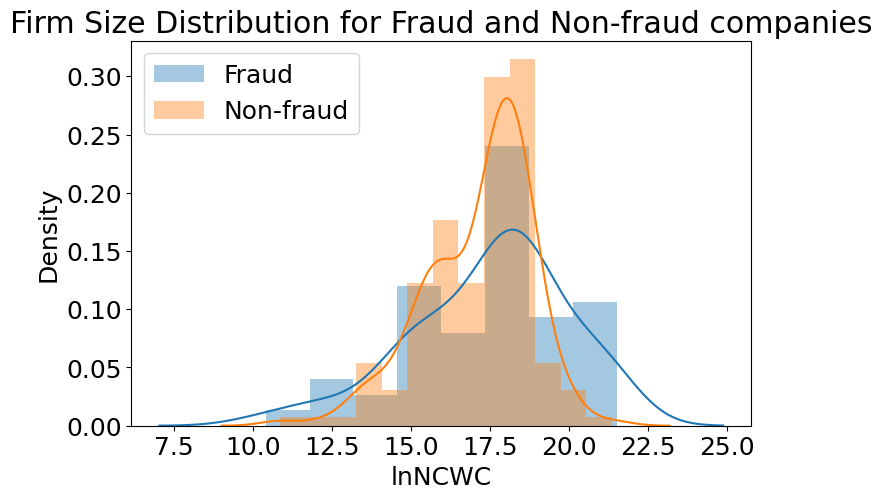

In [42]:
f, ax = plt.subplots( figsize =(8,5) ) 
sns.distplot( data_clean[data_clean.fraud == 1].lnNCWC, ax = ax, label = 'Fraud') 
sns.distplot( data_clean[data_clean.fraud == 0].lnNCWC, ax = ax, label = 'Non-fraud') 
plt.title( 'Firm Size Distribution for Fraud and Non-fraud companies' ) 
plt.legend() 
plt.show() 

In [43]:
data = data_clean[['lnTA', 'lnR', 'lnNI', 'NI/R', 'lnOM', 
                   'lnROE', 'lnROA', 'lnNCWC_gr', 'TA/R',
                   'Cash/R', 'NCWC/R', 'FA/TA', 'lnNCWC', 'fraud']]
data_new = data_clean[['TA', 'R', 'NI', 'NI/R', 'OM', 
                   'ROE', 'ROA', 'NCWC gr', 'TA/R',
                   'Cash/R', 'NCWC/R', 'FA/TA', 'NCWC t', 'fraud']]
dt = data_clean[['lnTA', 'lnR', 'NI', 'NI/R', 'OM', 
                   'ROE', 'ROA', 'NCWC gr', 'TA/R',
                   'Cash/R', 'NCWC/R', 'FA/TA', 'NCWC t', 'fraud']]

In [44]:
#X_fin = data.iloc[:,:-1]
#X_fin = data_new.iloc[:,:-1]
#X_fin = dt.iloc[:,:-1]
X_new = dt.iloc[:,:-1]
y = dt['fraud']

X_new.shape, y.shape

((386, 13), (386,))

In [45]:
X_new['fraud'] = dt['fraud']

## Корреляционная матрица

In [46]:
#corr = data.corr()
#corr = data_new.corr()

corr = X_new.corr()
#corr.style.background_gradient(cmap='Blues')
corr.style.background_gradient(cmap='Blues').to_excel('corr.xlsx')

In [47]:
data.rename(columns = {'NI/R' : 'NIR', 'TA/R' : 'TAR', 'Cash/R' : 'CashR', 
                       'NCWC/R' : 'NCWCR', 'FA/TA' : 'FATA'}, inplace = True )

data_new.rename(columns = {'NI/R' : 'NIR', 'TA/R' : 'TAR', 'Cash/R' : 'CashR', 
                           'NCWC/R' : 'NCWCR', 'FA/TA' : 'FATA', 
                           'NCWC t' : 'NCWC', 'NCWC gr' : 'NCWC_gr'}, inplace = True )

X_new.rename(columns = {'NI/R' : 'NIR', 'TA/R' : 'TAR', 'Cash/R' : 'CashR', 
                           'NCWC/R' : 'NCWCR', 'FA/TA' : 'FATA', 
                           'NCWC t' : 'NCWC', 'NCWC gr' : 'NCWC_gr'}, inplace = True )

In [48]:
X_new.to_csv('data_fin.csv')
#'lnTA', 'lnR', 'NI'
# 'NI', 'NCWC'
# 'ROA' 'NIR'
# CashR TAR NCWCR

In [49]:
def slope(xs, ys):
#    '''Вычисление наклона линии (углового коэффициента)'''
    return np.cov(xs, ys)[1][0] / np.var(xs)

def intercept(xs, ys): 
#     '''Вычисление точки пересечения (с осью Y)'''
   return np.mean(ys) - (np.mean(xs) * slope(xs, ys))

In [50]:
x = pd.read_csv('data_fin.csv')
X_new = x.drop(columns = ['Unnamed: 0', 'NI', 'lnR', 'ROA', 'fraud', 'NCWCR', 'CashR'], axis = 1)

const_ = 0
counter = 0
for i in X_new:
    counter += 1
    const_ += intercept(X_new[i], y)
const = const_ / counter

In [51]:
X_new.insert(0, "const", const)
X_new

,const,lnTA,NIR,OM,ROE,NCWC_gr,TAR,FATA,NCWC
0,0.093637,19.209543,0.027615,0.068152,0.048108,-20952000.00,1.836156,0.706610,-11844000.0
1,0.093637,19.115601,0.210903,0.274437,0.295480,2389000.00,1.744721,0.720466,9108000.0
2,0.093637,19.045463,0.118154,0.179184,0.163347,769000.00,1.728489,0.696468,6719000.0
3,0.093637,19.046052,0.142376,0.223040,0.147676,2523000.00,1.981026,0.647180,5950000.0
4,0.093637,19.084847,0.292696,0.410591,0.298158,-36578000.00,2.174230,0.598409,3427000.0
...,...,...,...,...,...,...,...,...,...
381,0.093637,20.230278,0.018689,0.036581,0.173090,-15461000.00,0.398554,0.497385,-120363000.0
382,0.093637,20.152793,0.024242,0.044285,0.198142,-7608000.00,0.436490,0.493453,-104902000.0
383,0.093637,19.975631,0.021565,0.044209,0.175464,-15119000.00,0.458063,0.490651,-97294000.0
384,0.093637,19.812249,0.017524,0.042655,0.135354,-51411000.00,0.497164,0.470015,-82175000.0


In [52]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.discrete.discrete_model as smd

results = smd.Logit(y, X_new).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.527798
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:                  386
Model:                          Logit   Df Residuals:                      377
Method:                           MLE   Df Model:                            8
Date:                Mon, 04 Sep 2023   Pseudo R-squ.:                 0.06378
Time:                        01:01:25   Log-Likelihood:                -203.73
converged:                       True   LL-Null:                       -217.61
Covariance Type:            nonrobust   LLR p-value:                 0.0005225
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -78.4509     19.727     -3.977      0.000    -117.115     -39.787
lnTA           0.2858      0.

## Масштабируем признаки

In [53]:
from sklearn.base import TransformerMixin
from sklearn.preprocessing import StandardScaler

class CustomScaler(TransformerMixin): # создаем собственный класс, опираясь на уже существующий метод
    def __init__(self, cols, scaler=None):
        self.cols = cols
        self.scaler = scaler or StandardScaler()
    def fit(self, X, y=None):
        num_cols = X.copy()[self.cols]
        self.scaler.fit(num_cols)
        return self
    def transform(self, X, y=None):
        X_res = X.copy()
        num_cols_tr = self.scaler.transform(X_res[self.cols])
        for i, col in enumerate(self.cols):
            X_res[col] = num_cols_tr[:,i]
        return X_res

In [54]:
sc = CustomScaler(X_new.columns.to_list())
X_new = sc.fit_transform(X_new)

X_new

,const,lnTA,NIR,OM,ROE,NCWC_gr,TAR,FATA,NCWC
0,1.387779e-17,-0.209155,-0.392584,-0.160041,-0.078126,-0.136239,0.232159,0.576862,-0.221442
1,1.387779e-17,-0.271557,0.804069,0.324094,-0.040669,0.011165,0.123577,0.636704,-0.139840
2,1.387779e-17,-0.318148,0.198533,0.100542,-0.060677,0.000934,0.104302,0.533062,-0.149145
3,1.387779e-17,-0.317757,0.356669,0.203467,-0.063050,0.012011,0.404196,0.320202,-0.152140
4,1.387779e-17,-0.291986,1.338082,0.643636,-0.040264,-0.234920,0.633630,0.109575,-0.161966
...,...,...,...,...,...,...,...,...,...
381,1.387779e-17,0.468884,-0.450856,-0.234137,-0.059201,-0.101562,-1.475032,-0.326716,-0.644091
382,1.387779e-17,0.417413,-0.414601,-0.216056,-0.055408,-0.051968,-1.429982,-0.343698,-0.583875
383,1.387779e-17,0.299730,-0.432081,-0.216235,-0.058842,-0.099402,-1.404363,-0.355796,-0.554244
384,1.387779e-17,0.191201,-0.458462,-0.219881,-0.064915,-0.328594,-1.357930,-0.444918,-0.495360


In [55]:
X_new.to_csv('model3_X.csv')

## Модели

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.33, stratify = y)

**Логистическая регрессия**

In [57]:
lr = LogisticRegression(random_state=42) 

params = {'solver': ['sag', 'saga', 'lbfgs'],
         'C': np.arange(1,100,1),
         'penalty': ['l1','l2','elasticnet']} 
grid_lr = GridSearchCV(lr, params, cv = 3, scoring = 'recall') 

grid_lr.fit(X_new, y)

print('best score:', grid_lr.best_score_)
print('best params:', grid_lr.best_params_)

best score: 0.06186868686868687
best params: {'C': 2, 'penalty': 'l1', 'solver': 'saga'}


In [58]:
lr = LogisticRegression(C = 10, solver = 'saga', penalty = 'l2') 

lr.fit(X_train, y_train)

lr_ypred_train = lr.predict(X_train)
lr_ypred_test = lr.predict(X_test)
lr_ypred = lr.predict(X_new)

In [59]:
accuracy_score(y_train,lr_ypred_train), accuracy_score(y_test,lr_ypred_test)

(0.7868217054263565, 0.78125)

In [60]:
f1_score(y_train,lr_ypred_train), f1_score(y_test,lr_ypred_test)

(0.28571428571428575, 0.2222222222222222)

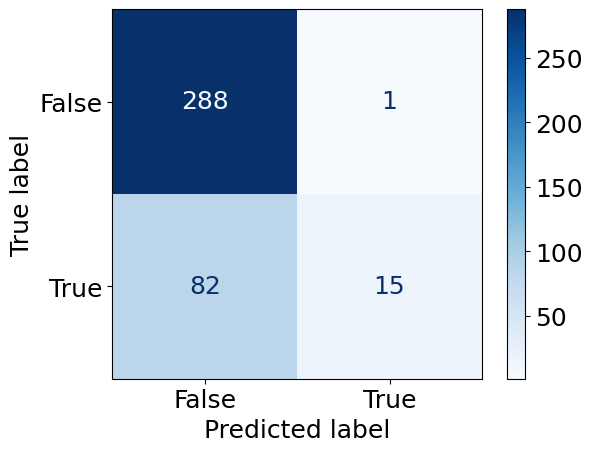

In [61]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y, lr_ypred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot(cmap = 'Blues')
plt.show()

**Дерево решений**

In [62]:
tree1 = DecisionTreeClassifier(random_state=42)
tree1.fit(X_train, y_train)

params = {'max_features': ['sqrt', 'log2'],
          'max_depth': np.arange(1,50),
         'criterion': ['gini', 'entropy', 'log_loss']}

tree_cv = GridSearchCV(tree1, params, cv = 3, scoring = 'recall')
tree_cv.fit(X_new, y)

print('Best params:', tree_cv.best_params_)
print('Best Score:', tree_cv.best_score_)

Best params: {'criterion': 'entropy', 'max_depth': 13, 'max_features': 'sqrt'}
Best Score: 0.2989267676767677


In [63]:
tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 17, max_features = 'sqrt') 

tree.fit(X_train, y_train)

tree_ypred_train = tree.predict(X_train)
tree_ypred_test = tree.predict(X_test)
tree_ypred = tree.predict(X_new)

In [64]:
accuracy_score(y_train,tree_ypred_train), accuracy_score(y_test,tree_ypred_test)

(1.0, 0.6875)

In [65]:
f1_score(y_train,tree_ypred_train), f1_score(y_test,tree_ypred_test)

(1.0, 0.3548387096774193)

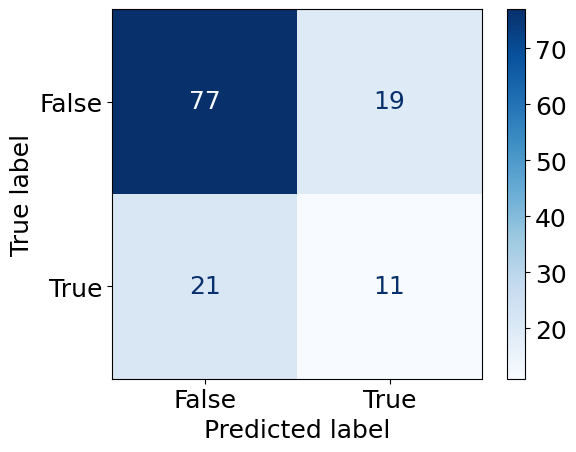

In [66]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, tree_ypred_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot(cmap = 'Blues')
plt.show()

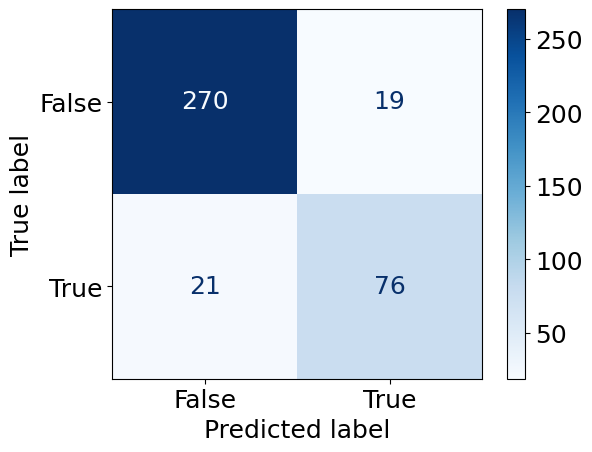

In [67]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y, tree_ypred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot(cmap = 'Blues')
plt.show()

**SGD**

In [68]:
sgd1 = SGDClassifier(random_state = 42)
sgd1.fit(X_train, y_train)

params = {'loss': ['modified_huber', 'log_loss'],
          'penalty': ['l2', 'l1', 'elasticnet']}

sgd_cv = GridSearchCV(sgd1, params, cv = 3, scoring = 'recall')
sgd_cv.fit(X_new, y)

print('Best params:', sgd_cv.best_params_)
print('Best Score:', sgd_cv.best_score_)

Best params: {'loss': 'log_loss', 'penalty': 'l2'}
Best Score: 0.28914141414141414


In [69]:
sgd = SGDClassifier(random_state = 42, loss = 'modified_huber', penalty = 'l2') 

sgd.fit(X_train, y_train)

sgd_ypred_train = sgd.predict(X_train)
sgd_ypred_test = sgd.predict(X_test)
sgd_ypred = sgd.predict(X_new)

In [70]:
accuracy_score(y_train,sgd_ypred_train), accuracy_score(y_test,sgd_ypred_test)

(0.7441860465116279, 0.75)

In [71]:
f1_score(y_train,sgd_ypred_train), f1_score(y_test,sgd_ypred_test)

(0.3125, 0.30434782608695654)

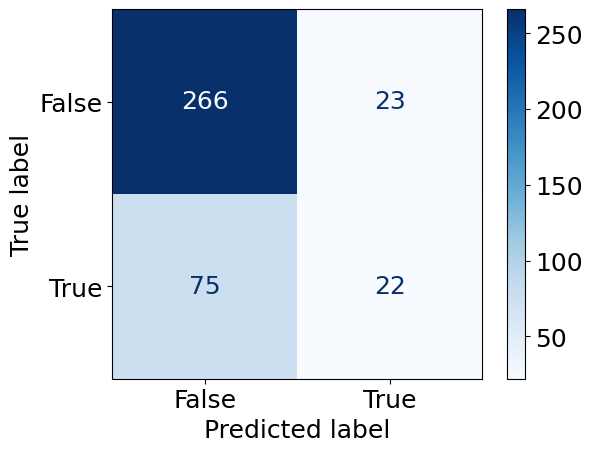

In [72]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y, sgd_ypred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot(cmap = 'Blues')
plt.show()

**SVM**

In [73]:
svm1 = SVC(random_state = 42)
svm1.fit(X_train, y_train)

params = {'C': np.arange(50,150,1),
          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

svm_cv = GridSearchCV(svm1, params, cv = 3, scoring = 'recall')
svm_cv.fit(X_new, y)

print('Best params:', svm_cv.best_params_)
print('Best Score:', svm_cv.best_score_)

Best params: {'C': 57, 'kernel': 'sigmoid'}
Best Score: 0.21654040404040406


In [74]:
svm = SVC(random_state = 42, C = 124, kernel = 'rbf', probability = True) 

svm.fit(X_train, y_train)

svm_ypred_train = svm.predict(X_train)
svm_ypred_test = svm.predict(X_test)
svm_ypred = svm.predict(X_new)

In [75]:
accuracy_score(y_train,svm_ypred_train), accuracy_score(y_test,svm_ypred_test)

(0.8527131782945736, 0.7421875)

In [76]:
f1_score(y_train,svm_ypred_train), f1_score(y_test,svm_ypred_test)

(0.6041666666666666, 0.2978723404255319)

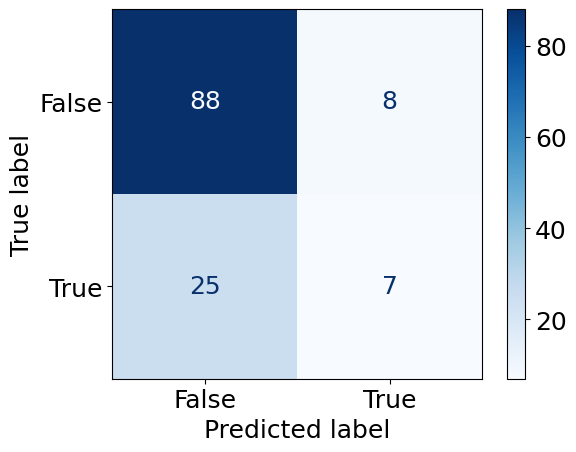

In [77]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, svm_ypred_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot(cmap = 'Blues')
plt.show()

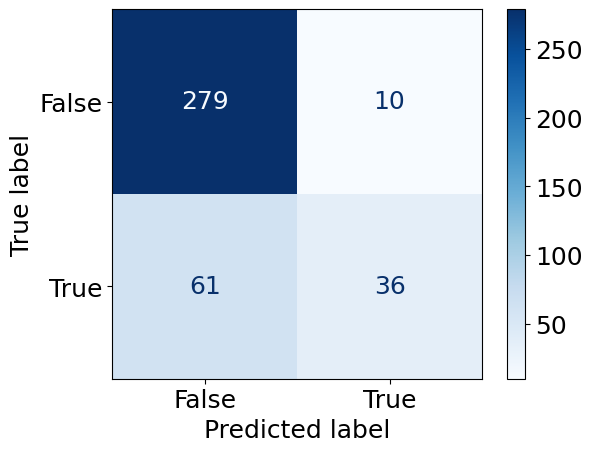

In [78]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y, svm_ypred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot(cmap = 'Blues')
plt.show()

**Gradient boosting**

In [79]:
boost1 = GradientBoostingClassifier(random_state = 42)
boost1.fit(X_train, y_train)

params = {'n_estimators': np.arange(0,80,1)}

boost_cv = GridSearchCV(boost1, params, cv = 3, scoring = 'recall')
boost_cv.fit(X_new, y)

print('Best params:', boost_cv.best_params_)
print('Best Score:', boost_cv.best_score_)

Best params: {'n_estimators': 65}
Best Score: 0.09311868686868686


In [80]:
params = {'max_features' : ['log2', 'sqrt', 'auto'],
          'criterion': ['friedman_mse', 'squared_error']}

boost01 = GradientBoostingClassifier(n_estimators = 63)

boost1_cv = GridSearchCV(boost01, params, cv = 3, scoring = 'recall')
boost1_cv.fit(X_new, y)

print('Best params:', boost1_cv.best_params_)
print('Best Score:', boost1_cv.best_score_)

Best params: {'criterion': 'friedman_mse', 'max_features': 'sqrt'}
Best Score: 0.08238636363636363


In [81]:
boost = GradientBoostingClassifier(n_estimators = 63, criterion = 'friedman_mse', max_features = 'log2')

boost.fit(X_train, y_train)

boost_ypred_train = boost.predict(X_train)
boost_ypred_test = boost.predict(X_test)
boost_ypred = boost.predict(X_new)

In [82]:
accuracy_score(y_train,boost_ypred_train), accuracy_score(y_test,boost_ypred_test)

(0.9069767441860465, 0.796875)

In [83]:
f1_score(y_train,boost_ypred_train), f1_score(y_test,boost_ypred_test)

(0.7735849056603773, 0.4583333333333333)

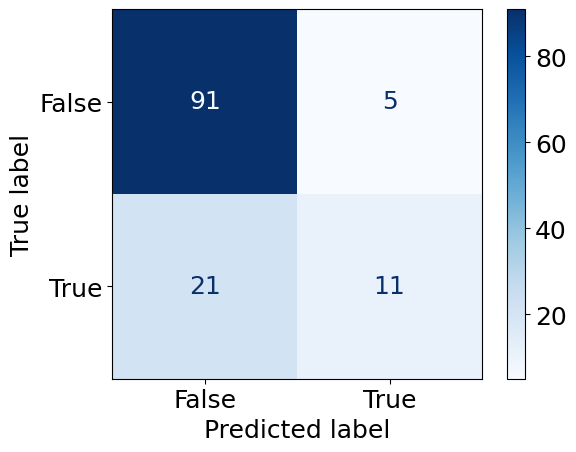

In [84]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, boost_ypred_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot(cmap = 'Blues')
plt.show()

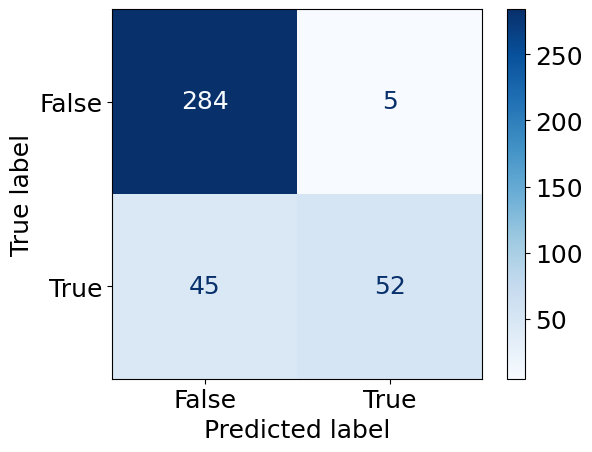

In [85]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y, boost_ypred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot(cmap = 'Blues')
plt.show()

## Выбор оптимальной модели

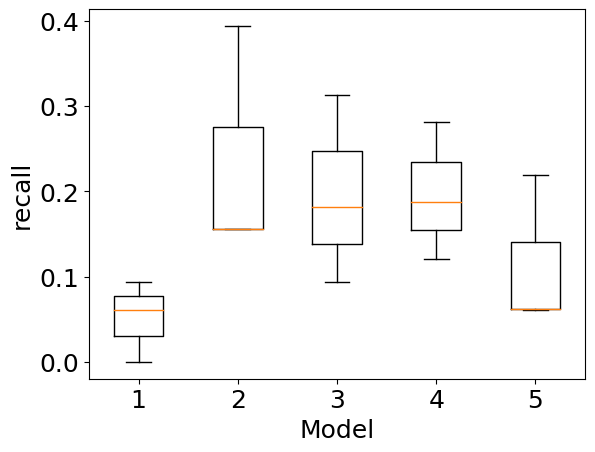

In [86]:
#1
cv_log_best = cross_validate(lr, X_new, y, cv = 3, scoring = 'recall')
    
#2
cv_tree_best = cross_validate(tree, X_new, y, cv = 3, scoring = 'recall')

#3
cv_sgd_best = cross_validate(sgd, X_new, y, cv = 3, scoring = 'recall')

#4
cv_svm_best = cross_validate(svm, X_new, y, cv = 3, scoring = 'recall')

#5
cv_boost_best = cross_validate(boost, X_new, y, cv = 3, scoring = 'recall')

dt = [cv_log_best['test_score'], cv_tree_best['test_score'], cv_sgd_best['test_score'],
        cv_svm_best['test_score'], cv_boost_best['test_score']]
plt.boxplot(dt)
plt.xlabel("Model")
plt.ylabel("recall")
plt.show()

In [87]:
precisions, recalls, f1scores, accuracys, rocaucs = [], [], [], [], []

def data(score):
    cv_log_best = cross_validate(lr, X_new, y, cv = 3, scoring = score)
    cv_tree_best = cross_validate(tree, X_new, y, cv = 3, scoring = score)
    cv_sgd_best = cross_validate(sgd, X_new, y, cv = 3, scoring = score)
    cv_svm_best = cross_validate(svm, X_new, y, cv = 3, scoring = score)
    cv_boost_best = cross_validate(boost, X_new, y, cv = 3, scoring = score)
    return [cv_log_best['test_score'], cv_tree_best['test_score'], cv_sgd_best['test_score'], 
            cv_svm_best['test_score'], cv_boost_best['test_score']]

def average(data, frame):
    for i in data:
        average = 0
        for j in i:
            average += j
        average = average / 3
        frame.append(average)
    return frame

average(data('precision'), precisions)
average(data('recall'), recalls)
average(data('roc_auc'), rocaucs)
average(data('f1'), f1scores)
average(data('accuracy'), accuracys)

[0.7306201550387597,
 0.5671229005167958,
 0.5854731912144703,
 0.6032784237726098,
 0.6138162144702842]

In [88]:
model = ['lr', 'tree', 'sgd', 'svm', 'boost']
metrics_cv = pd.DataFrame({'f1_score': f1scores, 'precision': precisions, 'recall': recalls, 'ROC AUC': rocaucs, 
                        'accuracy': accuracys}, index=model)
metrics_cv

,f1_score,precision,recall,ROC AUC,accuracy
lr,0.082290,0.209524,0.051452,0.415065,0.730620
tree,0.316345,0.213830,0.258207,0.436560,0.567123
sgd,0.198276,0.206473,0.196023,0.474412,0.585473
svm,0.209185,0.237857,0.196654,0.412032,0.603278
boost,0.070370,0.131398,0.051452,0.386810,0.613816


In [89]:
print(metrics_cv.max())

f1_score     0.316345
precision    0.237857
recall       0.258207
ROC AUC      0.474412
accuracy     0.730620
dtype: float64
